In [1]:
#from __future__ import print_function, absolute_import
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
#import cPickle as pickle
import _pickle as pickle
import numpy as np
import re

In [2]:
# Load data from Schneider's 50k dataset
dataSetB = pd.read_csv('../data/from_schneider/dataSetB.csv')
dataSetB['reactantSet_NameRxn'] = [eval(x) for x in dataSetB['reactantSet_NameRxn']]
print(len(dataSetB), 'rows')
dataSetB.head()

50000 rows


,rxn_Class,patentID,rxnSmiles_Mapping_NameRxn,reactantSet_NameRxn,NameRxn_Mapping_Complete,rxnSmiles_Mapping_IndigoTK,reactantSet_IndigoTK,IndigoTK_Mapping_Complete,rxnSmiles_IndigoAutoMapperKNIME,reactantSet_IndigoAutoMapperKNIME,IndigoAutoMapperKNIME_Mapping_Complete
0,6,US05849732,C.CCCCCC.CO.O=C(OCc1ccccc1)[NH:1][CH2:2][CH2:3...,"{3, 4}",True,C(OC([NH:11][CH2:12][CH2:13][CH2:14][CH2:15][C...,"set([0, 2])",True,C.CCCCCC.CO.[CH3:10][O:11][C:12]([C@@H:14]([NH...,"set([3, 4])",True
1,2,US20120114765A1,O[C:1](=[O:2])[c:3]1[cH:4][c:5]([N+:6](=[O:7])...,"{0, 1}",True,[Cl:1][c:2]1[cH:3][n:4][cH:5][c:6]([Cl:20])[c:...,"set([0, 1])",True,[NH2:1][c:2]1[c:11]2[c:6]([cH:7][n:8][cH:9][cH...,"set([0, 1])",True
2,1,US08003648B2,Cl.O=[CH:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[n:7...,"{1, 3}",True,[CH2:1]([NH:3][CH2:4][CH3:5])[CH3:2].C([BH3-])...,"set([0, 3])",True,[CH3:1][CH2:2][NH:3][CH2:4][CH3:5].[CH3:6][c:7...,"set([0, 1])",True
3,1,US09045475B2,CC(=O)O[BH-](OC(C)=O)OC(C)=O.ClCCl.O=[C:1]([CH...,"{2, 3}",True,[nH:1]1[c:5]2[n:6][cH:7][c:8]([O:10][c:11]3[cH...,"set([0, 3])",True,CC(O[BH-](OC(=O)C)OC(=O)C)=O.[CH3:14][C:15]1([...,"set([1, 3])",True
4,2,US08188098B2,CCN(C(C)C)C(C)C.ClCCl.Cl[C:1](=[O:2])[O:3][CH:...,"{2, 5}",True,Cl[C:2]([O:4][CH:5]1[CH2:9][CH2:8][CH2:7][CH2:...,"set([0, 2])",True,CCN(C(C)C)C(C)C.[CH3:10][CH2:11][O:12][c:13]1[...,"set([1, 4])",True


O[C:1](=[O:2])[c:3]1[cH:4][c:5]([N+:6](=[O:7])[O-:8])[c:9]([S:10][c:11]2[c:12]([Cl:13])[cH:14][n:15][cH:16][c:17]2[Cl:18])[s:19]1.[NH2:20][c:21]1[cH:22][cH:23][cH:24][c:25]2[cH:26][n:27][cH:28][cH:29][c:30]12>>[C:1](=[O:2])([c:3]1[cH:4][c:5]([N+:6](=[O:7])[O-:8])[c:9]([S:10][c:11]2[c:12]([Cl:13])[cH:14][n:15][cH:16][c:17]2[Cl:18])[s:19]1)[NH:20][c:21]1[cH:22][cH:23][cH:24][c:25]2[cH:26][n:27][cH:28][cH:29][c:30]12


RDKit ERROR: [06:16:33] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [06:16:33] Can't kekulize mol.  Unkekulized atoms: 3 4 5 9
RDKit ERROR: 
RDKit ERROR: [06:16:33] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [06:16:33] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [06:16:33] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [06:16:33] Can't kekulize mol.  Unkekulized atoms: 2 3 4 8
RDKit ERROR: 
RDKit ERROR: [06:16:33] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [06:16:33] Can't kekulize mol.  Unkekulized atoms: 3 4 5 9
RDKit ERROR: 
RDKit ERROR: [06:16:33] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [06:16:33] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [06:16:33] Explicit valence for atom # 5 N, 4, is greater than permitted
RD

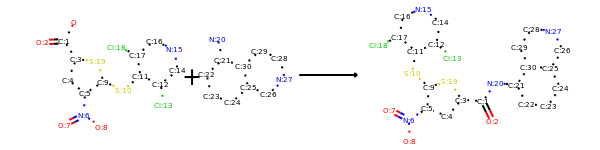

In [3]:
from rdkit.Chem.Draw import IPythonConsole 
IPythonConsole.ipython_useSVG=True 
#from rdkit import rdBase
#rdBase.DisableLog('rdApp.error')
pd.set_option('max_colwidth', 0)
rxnSmarts = dataSetB['rxnSmiles_Mapping_NameRxn'][1]
print(rxnSmarts)
AllChem.ReactionFromSmarts(rxnSmarts)

In [4]:
# Class stats
print(sum(dataSetB['rxn_Class'].value_counts()))
dataSetB['rxn_Class'].value_counts()

50000


1     15140
2     11889
6     8232 
3     5654 
7     4610 
9     1842 
4     909  
8     821  
5     672  
10    231  
Name: rxn_Class, dtype: int64

 # eliminate reactants which do not contain mapped atoms (dataSetB->data). If there are more than one product, then each product has a mapping. eliminate products which any contain non-mapped atom 

In [5]:
# Create new df from old (minor processing)
classes = []
ids = [] 
rxn_smiles = []
prod_smiles = []
for row in dataSetB.itertuples(): 
    if row[0] % 5000 == 0:
        #print('On index {:d}'.format(int(row[0])))
        print('{:d} rows has been processed'.format(int(row[0])))
        
    all_reactants, all_products = row[3].split('>>')
    products = [Chem.MolFromSmiles(smi) for smi in all_products.split('.')] 
    # Multiple products = enumerate
    for prod in products:
        # Make sure all have atom mapping
        if not all([a.HasProp('molAtomMapNumber') for a in prod.GetAtoms()]):
            continue
        
        prod_smi = Chem.MolToSmiles(prod, True)  
        # Re-parse reactants for each product so we can clear maps
        reactants = [Chem.MolFromSmiles(smi) for (i, smi) in enumerate(
            all_reactants.split('.')) if i in row[4]] # row[4] === dataSetB['reactantSet_NameRxn'] indicates which reactants are envolved in atom mapping 
                        
        # Get rid of reactants when they don't contribute to this prod
        prod_maps = set(re.findall('\:([[0-9]+)\]', prod_smi)) 
        reactants_smi_list = []
        for mol in reactants: # Go through all reactant and locate those contain mapped atoms in product 
            used = False
            for a in mol.GetAtoms():
                if a.HasProp('molAtomMapNumber'):
                    if a.GetProp('molAtomMapNumber') in prod_maps:
                        used = True 
                    else:
                        a.ClearProp('molAtomMapNumber')
            if used:
                reactants_smi_list.append(Chem.MolToSmiles(mol, True))
                
        reactants_smi = '.'.join(reactants_smi_list)
        
        # Was this just a spectator? Some examples are HCl>>HCl
        if reactants_smi == prod_smi:
            continue
        
        # Append to ongoing list
        classes.append(row[1])
        ids.append(row[2])
        rxn_smiles.append('{}>>{}'.format(reactants_smi, prod_smi))
        # Save non-mapped prod too
        [a.ClearProp('molAtomMapNumber') for a in prod.GetAtoms()]
        prod_smiles.append(Chem.MolToSmiles(prod, True)) 
data = pd.DataFrame({'class': classes, 
                     'id': ids, 
                     'rxn_smiles': rxn_smiles,
                     'prod_smiles': prod_smiles})

0 rows has been processed
5000 rows has been processed
10000 rows has been processed
15000 rows has been processed
20000 rows has been processed
25000 rows has been processed
30000 rows has been processed
35000 rows has been processed
40000 rows has been processed
45000 rows has been processed


In [6]:
#see non-mapped atom Cl at '...[cH:12]1 >> Cl [CH2:1]...' of dataSetB.iloc[4423][2]
dataSetB.iloc[4423][2]

'ClCCl.[CH3:1][S:2][c:3]1[cH:4][cH:5][c:6]([CH2:7][N:8]=[N+:9]=[N-:10])[cH:11][cH:12]1>>Cl[CH2:1][S:2][c:3]1[cH:4][cH:5][c:6]([CH2:7][N:8]=[N+:9]=[N-:10])[cH:11][cH:12]1'

In [7]:
# You should notice that 50126 new mapped reactions from 50k old mapped reactions.
print(len(data))

50126


In [8]:
data.head()

,class,id,prod_smiles,rxn_smiles
0,6,US05849732,COC(=O)[C@H](CCCCN)NC(=O)Nc1cc(OC)cc(C(C)(C)C)c1O,O=C(OCc1ccccc1)[NH:1][CH2:2][CH2:3][CH2:4][CH2:5][C@@H:6]([C:7]([O:8][CH3:9])=[O:10])[NH:11][C:12](=[O:13])[NH:14][c:15]1[cH:16][c:17]([O:18][CH3:19])[cH:20][c:21]([C:22]([CH3:23])([CH3:24])[CH3:25])[c:26]1[OH:27]>>[NH2:1][CH2:2][CH2:3][CH2:4][CH2:5][C@@H:6]([C:7]([O:8][CH3:9])=[O:10])[NH:11][C:12](=[O:13])[NH:14][c:15]1[cH:16][c:17]([O:18][CH3:19])[cH:20][c:21]([C:22]([CH3:23])([CH3:24])[CH3:25])[c:26]1[OH:27]
1,2,US20120114765A1,O=C(Nc1cccc2cnccc12)c1cc([N+](=O)[O-])c(Sc2c(Cl)cncc2Cl)s1,O[C:1](=[O:2])[c:3]1[cH:4][c:5]([N+:6](=[O:7])[O-:8])[c:9]([S:10][c:11]2[c:12]([Cl:13])[cH:14][n:15][cH:16][c:17]2[Cl:18])[s:19]1.[NH2:20][c:21]1[cH:22][cH:23][cH:24][c:25]2[cH:26][n:27][cH:28][cH:29][c:30]12>>[C:1](=[O:2])([c:3]1[cH:4][c:5]([N+:6](=[O:7])[O-:8])[c:9]([S:10][c:11]2[c:12]([Cl:13])[cH:14][n:15][cH:16][c:17]2[Cl:18])[s:19]1)[NH:20][c:21]1[cH:22][cH:23][cH:24][c:25]2[cH:26][n:27][cH:28][cH:29][c:30]12
2,1,US08003648B2,CCN(CC)Cc1ccc(-c2nc(C)c(COc3ccc([C@H](CC(=O)N4C(=O)OC[C@@H]4Cc4ccccc4)c4ccon4)cc3)s2)cc1,O=[CH:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[n:7][c:8]([CH3:9])[c:10]([CH2:11][O:12][c:13]3[cH:14][cH:15][c:16]([C@H:17]([CH2:18][C:19](=[O:20])[N:21]4[C:22](=[O:23])[O:24][CH2:25][C@@H:26]4[CH2:27][c:28]4[cH:29][cH:30][cH:31][cH:32][cH:33]4)[c:34]4[cH:35][cH:36][o:37][n:38]4)[cH:39][cH:40]3)[s:41]2)[cH:42][cH:43]1.[CH3:44][CH2:45][NH:46][CH2:47][CH3:48]>>[CH2:1]([c:2]1[cH:3][cH:4][c:5](-[c:6]2[n:7][c:8]([CH3:9])[c:10]([CH2:11][O:12][c:13]3[cH:14][cH:15][c:16]([C@H:17]([CH2:18][C:19](=[O:20])[N:21]4[C:22](=[O:23])[O:24][CH2:25][C@@H:26]4[CH2:27][c:28]4[cH:29][cH:30][cH:31][cH:32][cH:33]4)[c:34]4[cH:35][cH:36][o:37][n:38]4)[cH:39][cH:40]3)[s:41]2)[cH:42][cH:43]1)[N:46]([CH2:45][CH3:44])[CH2:47][CH3:48]
3,1,US09045475B2,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NCC5CN(C(CF)CF)C5)c([N+](=O)[O-])c4)c(Oc4cnc5[nH]ccc5c4)c3)CC2)=C(c2ccc(Cl)cc2)C1,O=[C:1]([CH2:2][F:3])[CH2:4][F:5].[CH3:6][C:7]1([CH3:8])[CH2:9][CH2:10][C:11]([CH2:12][N:13]2[CH2:14][CH2:15][N:16]([c:17]3[cH:18][cH:19][c:20]([C:21](=[O:22])[NH:23][S:24](=[O:25])(=[O:26])[c:27]4[cH:28][cH:29][c:30]([NH:31][CH2:32][CH:33]5[CH2:34][NH:35][CH2:36]5)[c:37]([N+:38](=[O:39])[O-:40])[cH:41]4)[c:42]([O:43][c:44]4[cH:45][n:46][c:47]5[nH:48][cH:49][cH:50][c:51]5[cH:52]4)[cH:53]3)[CH2:54][CH2:55]2)=[C:56]([c:57]2[cH:58][cH:59][c:60]([Cl:61])[cH:62][cH:63]2)[CH2:64]1>>[CH:1]([CH2:2][F:3])([CH2:4][F:5])[N:35]1[CH2:34][CH:33]([CH2:32][NH:31][c:30]2[cH:29][cH:28][c:27]([S:24]([NH:23][C:21]([c:20]3[cH:19][cH:18][c:17]([N:16]4[CH2:15][CH2:14][N:13]([CH2:12][C:11]5=[C:56]([c:57]6[cH:58][cH:59][c:60]([Cl:61])[cH:62][cH:63]6)[CH2:64][C:7]([CH3:6])([CH3:8])[CH2:9][CH2:10]5)[CH2:55][CH2:54]4)[cH:53][c:42]3[O:43][c:44]3[cH:45][n:46][c:47]4[nH:48][cH:49][cH:50][c:51]4[cH:52]3)=[O:22])(=[O:25])=[O:26])[cH:41][c:37]2[N+:38](=[O:39])[O-:40])[CH2:36]1
4,2,US08188098B2,CCOc1ccc(Oc2ncnc3c2cnn3C2CCN(C(=O)OC3CCCC3)CC2)c(F)c1,Cl[C:1](=[O:2])[O:3][CH:4]1[CH2:5][CH2:6][CH2:7][CH2:8]1.[CH3:9][CH2:10][O:11][c:12]1[cH:13][cH:14][c:15]([O:16][c:17]2[n:18][cH:19][n:20][c:21]3[c:22]2[cH:23][n:24][n:25]3[CH:26]2[CH2:27][CH2:28][NH:29][CH2:30][CH2:31]2)[c:32]([F:33])[cH:34]1>>[C:1](=[O:2])([O:3][CH:4]1[CH2:5][CH2:6][CH2:7][CH2:8]1)[N:29]1[CH2:28][CH2:27][CH:26]([n:25]2[c:21]3[n:20][cH:19][n:18][c:17]([O:16][c:15]4[cH:14][cH:13][c:12]([O:11][CH2:10][CH3:9])[cH:34][c:32]4[F:33])[c:22]3[cH:23][n:24]2)[CH2:31][CH2:30]1


In [9]:
data['class'].value_counts()

1     15247
2     11906
6     8237 
3     5666 
7     4614 
9     1834 
4     909  
8     811  
5     672  
10    230  
Name: class, dtype: int64

In [10]:
# Find most popular product smiles (probably frags/salts)
from collections import Counter
prod_smi_counter = Counter(data['prod_smiles'])
print(prod_smi_counter.most_common(25))

[('[Br-]', 48), ('[I-]', 26), ('[Cl-]', 19), ('Cl', 17), ('CC(C)(C)OC(=O)N1CCC(CO)CC1', 6), ('Cc1cccc(C2CC2)c1Oc1nnc(Cl)cc1O', 4), ('Cc1ccc(-c2ccccc2C#N)cc1', 4), ('COc1cc2nccc(Oc3ccc(N)cc3)c2cc1OC', 4), ('COC(=O)c1cccc(N)c1N', 4), ('CN(C)CCn1cc(B2OC(C)(C)C(C)(C)O2)cn1', 3), ('OC(c1ccccc1)c1ccccc1', 3), ('COc1ccc(-c2ccccc2)cc1', 3), ('O=C(NC(CC1C(=O)Nc2ccccc21)C(=O)O)c1ccc(Cl)cc1', 3), ('c1ccc(Pc2ccccc2)cc1', 3), ('Cc1noc(NS(=O)(=O)c2cc(Cl)ccc2Cl)c1Br', 3), ('Cc1ccc(N)c(N)n1', 3), ('O=C(NCCN1CCOCC1)c1ccc(Cl)cc1', 3), ('CC(C)(C)OC(=O)N1CCC(CCO)CC1', 3), ('CC(C)(C)OC(=O)N1CCN(Cc2ccc(Br)cc2)CC1', 3), ('O=C(O)CCCCCNC(=O)C(F)(F)F', 3), ('CC(C)(C)OC(=O)c1ccc(CBr)cc1', 3), ('CC(C)(C)OC(=O)N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)c(F)cc1F', 3), ('c1ccc(C(c2ccccc2)(c2ccccc2)n2ccnc2)cc1', 3), ('Fc1cc(Br)ccc1OCc1ccccc1', 3), ('Nc1cc(Br)ccc1O', 3)]


In [11]:
data['prod_smiles_pop'] = [prod_smi_counter[smi] for smi in data['prod_smiles']]
data['keep'] = [x[5] < 10 and len(x[4]) >= 5 for x in data.itertuples()] # not tiny molecule and popularity > 5
data.loc[data['keep']]['class'].value_counts()

1     15151
2     11896
6     8237 
3     5662 
7     4614 
9     1834 
4     909  
8     811  
5     672  
10    230  
Name: class, dtype: int64

In [12]:
data.loc[data['keep']].to_csv('../data/data_processed.csv')

In [13]:
data.head(1)

,class,id,prod_smiles,rxn_smiles,prod_smiles_pop,keep
0,6,US05849732,COC(=O)[C@H](CCCCN)NC(=O)Nc1cc(OC)cc(C(C)(C)C)c1O,O=C(OCc1ccccc1)[NH:1][CH2:2][CH2:3][CH2:4][CH2:5][C@@H:6]([C:7]([O:8][CH3:9])=[O:10])[NH:11][C:12](=[O:13])[NH:14][c:15]1[cH:16][c:17]([O:18][CH3:19])[cH:20][c:21]([C:22]([CH3:23])([CH3:24])[CH3:25])[c:26]1[OH:27]>>[NH2:1][CH2:2][CH2:3][CH2:4][CH2:5][C@@H:6]([C:7]([O:8][CH3:9])=[O:10])[NH:11][C:12](=[O:13])[NH:14][c:15]1[cH:16][c:17]([O:18][CH3:19])[cH:20][c:21]([C:22]([CH3:23])([CH3:24])[CH3:25])[c:26]1[OH:27],1,True
